# Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Q1

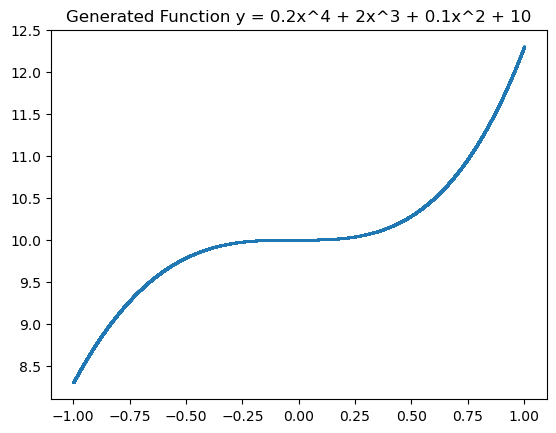

In [2]:
# Q1: Generate Dataset
def generate_dataset(n_samples=30000):
    x = np.linspace(-1, 1, n_samples)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    return x.reshape(-1, 1), y.reshape(-1, 1)

x, y = generate_dataset()
plt.scatter(x, y, s=1)
plt.title("Generated Function y = 0.2x^4 + 2x^3 + 0.1x^2 + 10")
plt.show()

# Q2

In [3]:
# Q2: Data Shuffling
def get_dataset(shuffle):
    x, y = generate_dataset()
    if shuffle:
        p = np.random.permutation(len(x))
        x, y = x[p], y[p]
    return x, y

# Q3

In [4]:
# Q3: Data Splitting
def split_data(x, y):
    # Calculate the number of samples for each split
    n = len(x)
    train_end = int(0.3 * n)
    val_end = train_end + int(0.2 * n)

    # Split the data
    x_train, x_val, x_test = x[:train_end], x[train_end:val_end], x[val_end:]
    y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

    return x_train, x_val, x_test, y_train, y_val, y_test

# Q4

In [5]:
# Q4: Data Scaling
def scale_data(x,y):
    scaledx = (x-np.min(x))/(np.max(x)-np.min(x))
    scaledy = (y-np.min(y))/(np.max(y)-np.min(y))
    return scaledx, scaledy

# Q5

In [6]:
# Q5: Error Metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Models

In [7]:
# Neural Network Structures
def build_model(structure, activation='relu'):
    model = tf.keras.Sequential()
    for units in structure:
        model.add(tf.keras.layers.Dense(units, activation=activation))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training Function
def train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val),verbose=0)
    y_pred = model.predict(x_test)
    metrics = calculate_metrics(y_test, y_pred)
    return y_pred, metrics



## Shuffled

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


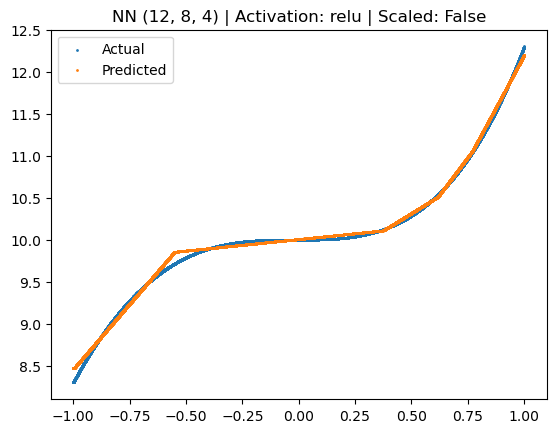

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


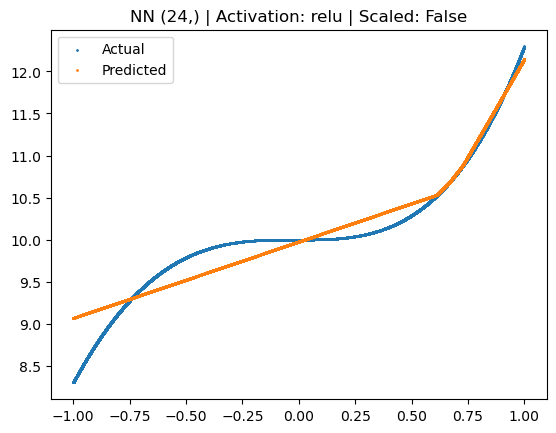

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step


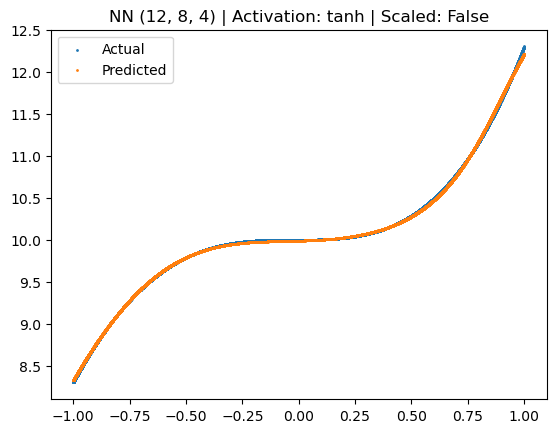

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


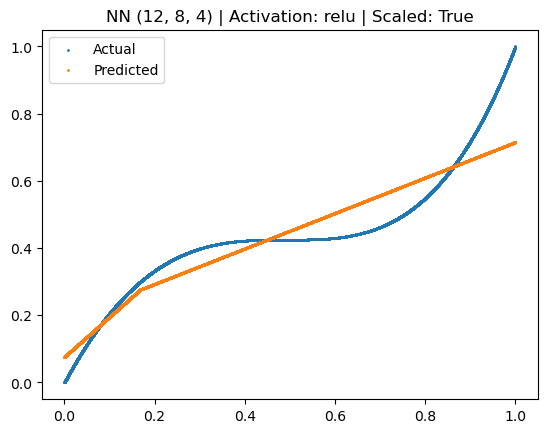

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


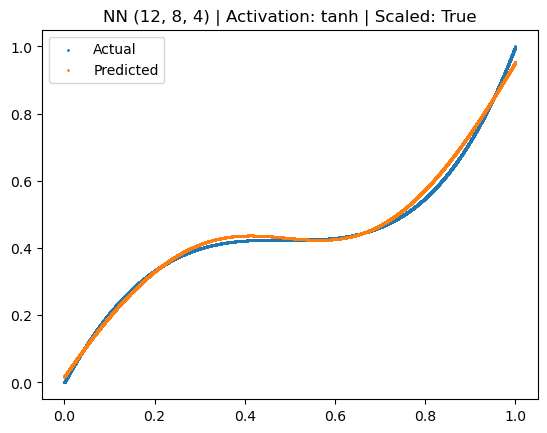

Model 1:
  Structure: (12, 8, 4)
  Activation: relu
  MAE: 0.0330
  MSE: 0.0018
  RMSE: 0.0429
  R² Score: 0.9968
----------------------------------------
Model 2:
  Structure: (24,)
  Activation: relu
  MAE: 0.1557
  MSE: 0.0416
  RMSE: 0.2040
  R² Score: 0.9277
----------------------------------------
Model 3:
  Structure: (12, 8, 4)
  Activation: tanh
  MAE: 0.0107
  MSE: 0.0002
  RMSE: 0.0148
  R² Score: 0.9996
----------------------------------------
Model 4:
  Structure: (12, 8, 4)
  Activation: relu
  MAE: 0.0564
  MSE: 0.0055
  RMSE: 0.0740
  R² Score: 0.8480
----------------------------------------
Model 5:
  Structure: (12, 8, 4)
  Activation: tanh
  MAE: 0.0112
  MSE: 0.0002
  RMSE: 0.0144
  R² Score: 0.9943
----------------------------------------


In [8]:
# Experiment Cases
cases = [
    ((12, 8, 4), 'relu', False), ((24,), 'relu', False), ((12, 8, 4), 'tanh', False),
    ((12, 8, 4), 'relu', True), ((12, 8, 4), 'tanh', True)
]

results = []
for structure, activation, scale in cases:
    x, y = get_dataset(True)
   # Split the data into 30% train, 20% validation, and 50% test
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x, y)

    # Scale the data if required
    # Initialize scaler_x and scaler_y outside the 'if' block
    if scale:
        x_train, y_train=scale_data(x_train, y_train)
        x_val, y_val=scale_data(x_val, y_val)
        x_test, y_test=scale_data(x_test, y_test)


    # Build and train the model
    model = build_model(structure, activation)
    y_pred, metrics = train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test)
    results.append((structure, activation, metrics))

    # Plot actual vs. predicted values
    plt.scatter(x_test, y_test, label='Actual', s=1)
    plt.scatter(x_test, y_pred, label='Predicted', s=1)
    plt.title(f"NN {structure} | Activation: {activation} | Scaled: {scale}")
    plt.legend()
    plt.show()

# Display error metrics for each model configuration
for i, (structure, activation, metrics) in enumerate(results):
    mae, mse, rmse, r2 = metrics
    print(f"Model {i + 1}:")
    print(f"  Structure: {structure}")
    print(f"  Activation: {activation}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

## Unshuffled

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step


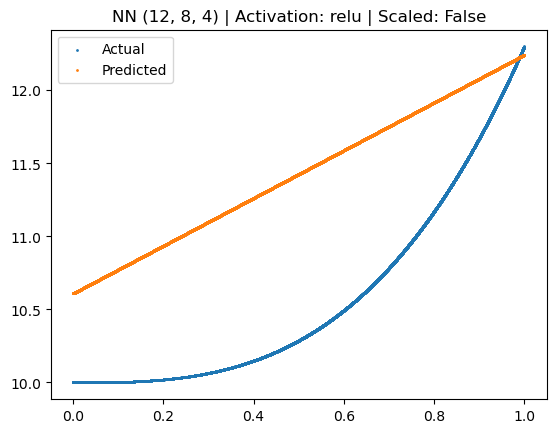

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


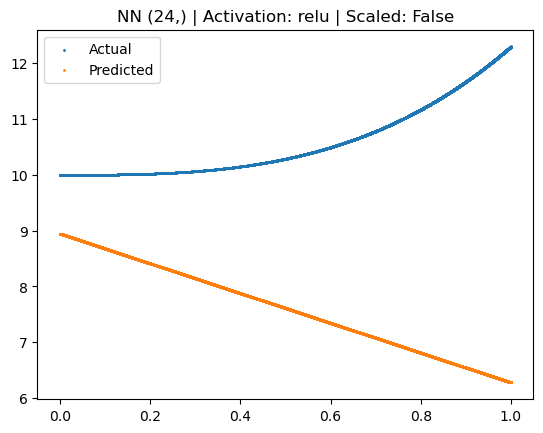

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


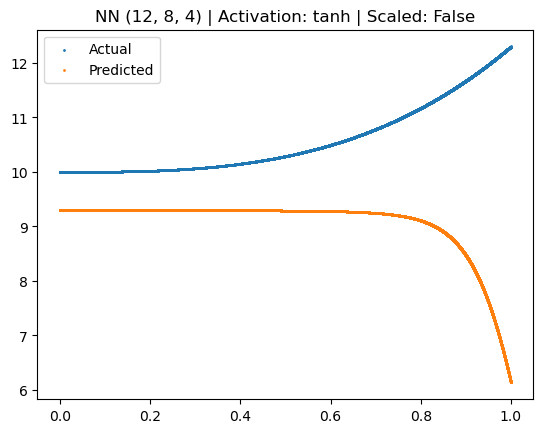

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


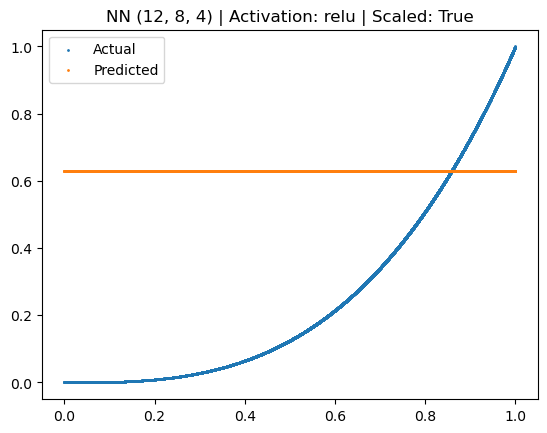

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


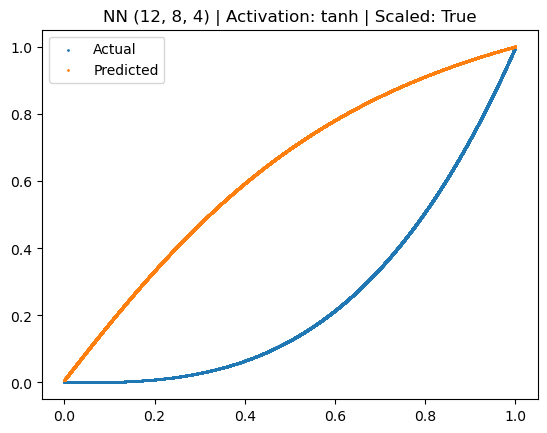

Model 1:
  Structure: (12, 8, 4)
  Activation: relu
  MAE: 0.8532
  MSE: 0.8100
  RMSE: 0.9000
  R² Score: -0.9211
----------------------------------------
Model 2:
  Structure: (24,)
  Activation: relu
  MAE: 2.9609
  MSE: 10.6973
  RMSE: 3.2707
  R² Score: -24.3713
----------------------------------------
Model 3:
  Structure: (12, 8, 4)
  Activation: tanh
  MAE: 1.5127
  MSE: 3.6548
  RMSE: 1.9118
  R² Score: -7.6683
----------------------------------------
Model 4:
  Structure: (12, 8, 4)
  Activation: relu
  MAE: 0.4306
  MSE: 0.2250
  RMSE: 0.4743
  R² Score: -1.8227
----------------------------------------
Model 5:
  Structure: (12, 8, 4)
  Activation: tanh
  MAE: 0.3808
  MSE: 0.1746
  RMSE: 0.4178
  R² Score: -1.1906
----------------------------------------


In [9]:
# Experiment Cases
cases = [
    ((12, 8, 4), 'relu', False), ((24,), 'relu', False), ((12, 8, 4), 'tanh', False),
    ((12, 8, 4), 'relu', True), ((12, 8, 4), 'tanh', True)
]

results = []
for structure, activation, scale in cases:
    x, y = get_dataset(False)
   # Split the data into 30% train, 20% validation, and 50% test
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x, y)

    # Scale the data if required
    # Initialize scaler_x and scaler_y outside the 'if' block
    if scale:
        x_train, y_train=scale_data(x_train, y_train)
        x_val, y_val=scale_data(x_val, y_val)
        x_test, y_test=scale_data(x_test, y_test)


    # Build and train the model
    model = build_model(structure, activation)
    y_pred, metrics = train_and_evaluate(model, x_train, y_train, x_val, y_val, x_test, y_test)
    results.append((structure, activation, metrics))

    # Plot actual vs. predicted values
    plt.scatter(x_test, y_test, label='Actual', s=1)
    plt.scatter(x_test, y_pred, label='Predicted', s=1)
    plt.title(f"NN {structure} | Activation: {activation} | Scaled: {scale}")
    plt.legend()
    plt.show()

# Display error metrics for each model configuration
for i, (structure, activation, metrics) in enumerate(results):
    mae, mse, rmse, r2 = metrics
    print(f"Model {i + 1}:")
    print(f"  Structure: {structure}")
    print(f"  Activation: {activation}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

# Q6

In [11]:
# XOR Problem
XOR_data = np.array([[0,0],[0,1],[1,0],[1,1]])
XOR_labels = np.array([[0],[1],[1],[0]])

def build_xor_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

xor_model = build_xor_nn()
xor_model.fit(XOR_data, XOR_labels, epochs=500, verbose=0)
y_pred_xor = (xor_model.predict(XOR_data) > 0.5).astype(int)

print("XOR Predictions:", y_pred_xor.T)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
XOR Predictions: [[0 1 1 0]]
